In [1]:
import timeit 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from scipy import stats
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

## Tipos de datos del csv

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
penguins = penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [6]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
penguins.describe(include="O")

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


## Medidas de tendencia central



In [8]:
penguins["body_mass_g"].mean()

4207.057057057057

In [9]:
penguins["body_mass_g"].median()

4050.0

In [10]:
penguins["body_mass_g"].mode()

0    3800.0
dtype: float64

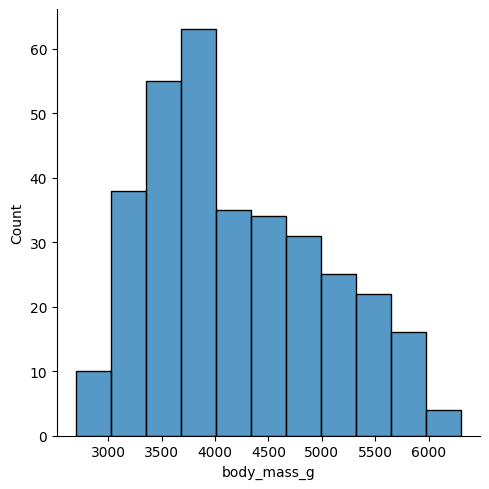

In [11]:
sns.displot(data=penguins, x="body_mass_g")
plt.show()

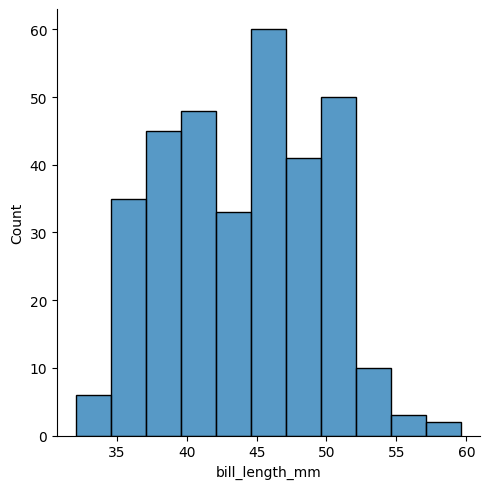

In [12]:
sns.displot(data=penguins, x="bill_length_mm")
plt.show()

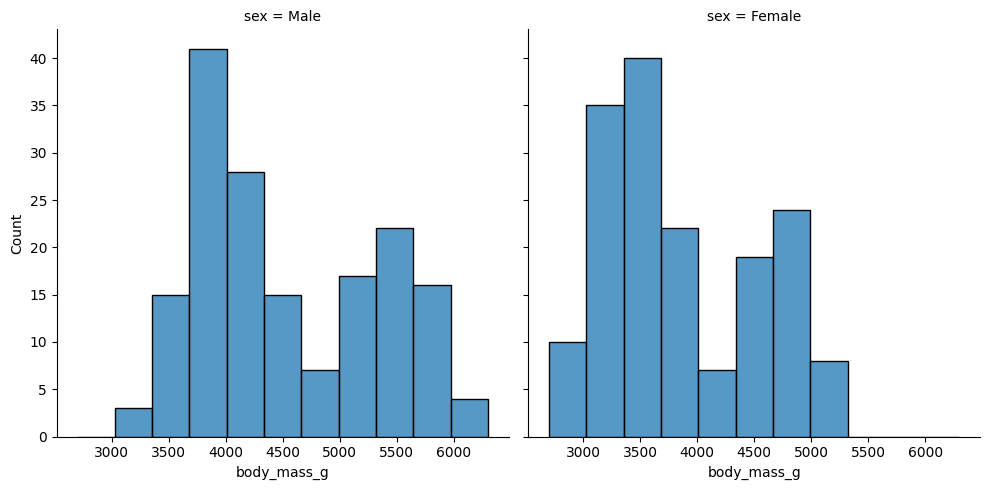

In [13]:
sns.displot(data=penguins, x="body_mass_g", col="sex")
plt.show()

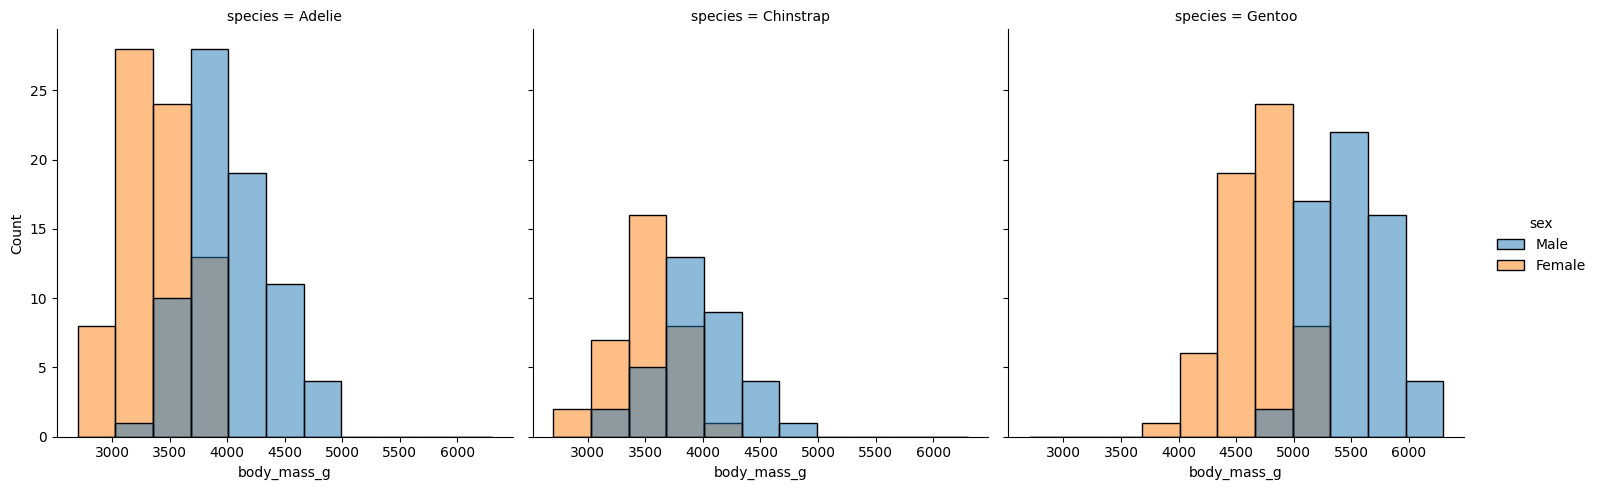

In [14]:
sns.displot(data=penguins, x="body_mass_g", col="species", hue="sex")
plt.show()

In [15]:
penguins["island"].nunique()

3

In [16]:
penguins.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,146,146,146,146,146,146
Chinstrap,68,68,68,68,68,68
Gentoo,119,119,119,119,119,119


<AxesSubplot: xlabel='body_mass_g', ylabel='Count'>

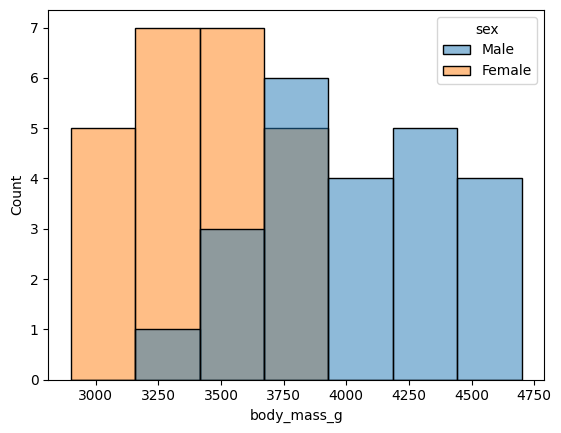

In [17]:
penguins_df = penguins[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen')]
sns.histplot(penguins_df, x='body_mass_g', hue="sex")

Medidas de dispersión

In [18]:
# Desviación estándar
lista=["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]
for n in lista:
  print(f"Desviación estándar de {n} => {round(penguins[n].std(),2)}\n")

Desviación estándar de bill_length_mm => 5.47

Desviación estándar de bill_depth_mm => 1.97

Desviación estándar de flipper_length_mm => 14.02

Desviación estándar de body_mass_g => 805.22



In [19]:
#Calculo de rangos
for n in lista:
  print(f"El rango de {n} => {penguins[n].max() - penguins[n].min()}\n")

El rango de bill_length_mm => 27.5

El rango de bill_depth_mm => 8.4

El rango de flipper_length_mm => 59.0

El rango de body_mass_g => 3600.0



In [20]:
# Cuartile  y IQR
for n in lista:
  median = penguins[n].median()
  Q1 = penguins[n].quantile(q=0.25)
  Q3 = penguins[n].quantile(q=0.75)
  min_val = penguins[n].quantile(q=0)
  max_val = penguins[n].quantile(q=1)
  print(f"El caurtile de {n} => {min_val, Q1, median, Q3, max_val}")
  print(f"El IQR de {n} => {round(Q3-Q1,2)}\n")

El caurtile de bill_length_mm => (32.1, 39.5, 44.5, 48.6, 59.6)
El IQR de bill_length_mm => 9.1

El caurtile de bill_depth_mm => (13.1, 15.6, 17.3, 18.7, 21.5)
El IQR de bill_depth_mm => 3.1

El caurtile de flipper_length_mm => (172.0, 190.0, 197.0, 213.0, 231.0)
El IQR de flipper_length_mm => 23.0

El caurtile de body_mass_g => (2700.0, 3550.0, 4050.0, 4775.0, 6300.0)
El IQR de body_mass_g => 1225.0



Límites para detección de outliers

In [21]:
for n in lista:
  Q1 = penguins[n].quantile(q=0.25)
  Q3 = penguins[n].quantile(q=0.75)
  iqr= Q3-Q1
  minlimit = Q1 - 1.5*iqr 
  maxlimit = Q3 + 1.3*iqr
  print(f"El limite minimo de {n} => {round(minlimit,2)}")
  print(f"El limite maxaximo de {n} => {round(maxlimit,2)}\n")

El limite minimo de bill_length_mm => 25.85
El limite maxaximo de bill_length_mm => 60.43

El limite minimo de bill_depth_mm => 10.95
El limite maxaximo de bill_depth_mm => 22.73

El limite minimo de flipper_length_mm => 155.5
El limite maxaximo de flipper_length_mm => 242.9

El limite minimo de body_mass_g => 1712.5
El limite maxaximo de body_mass_g => 6367.5



## Exploración visual de los datos

<AxesSubplot: xlabel='sex', ylabel='body_mass_g'>

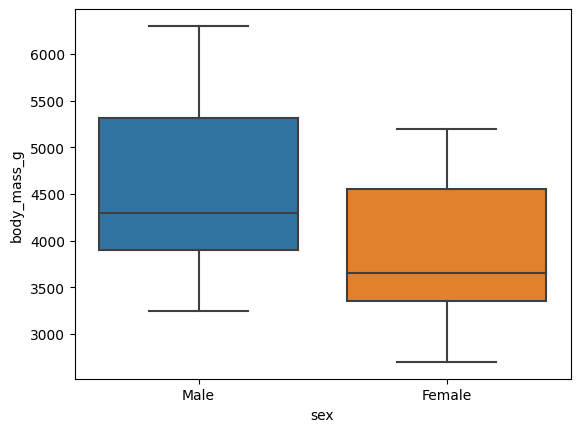

In [22]:
sns.boxplot(data= penguins,x="sex",y="body_mass_g")

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

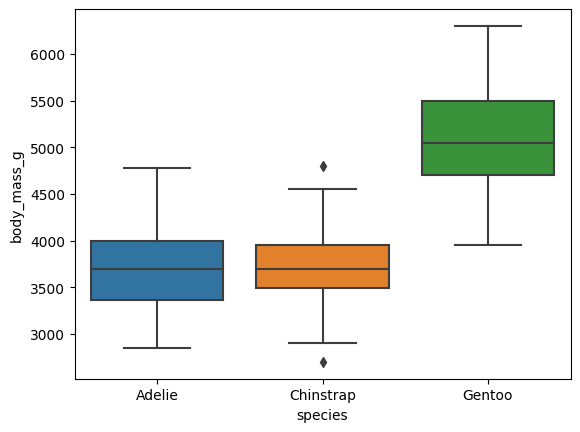

In [23]:
sns.boxplot(data= penguins,x="species",y="body_mass_g")

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

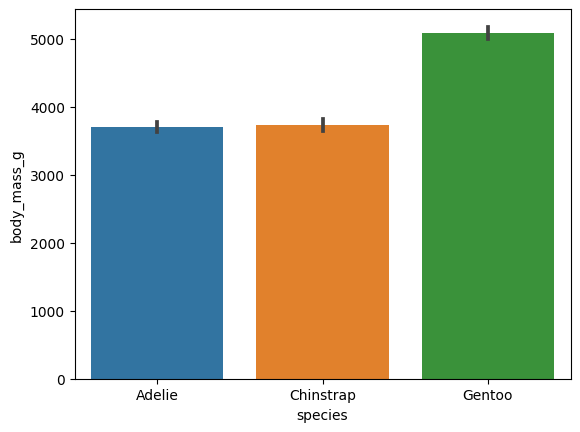

In [24]:
sns.barplot(data= penguins,x="species",y="body_mass_g")

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

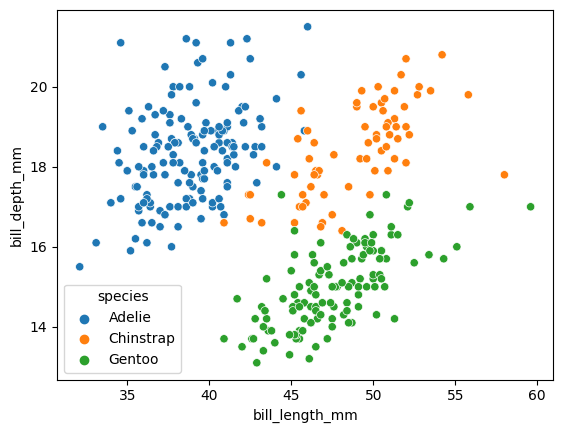

In [25]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue='species')	

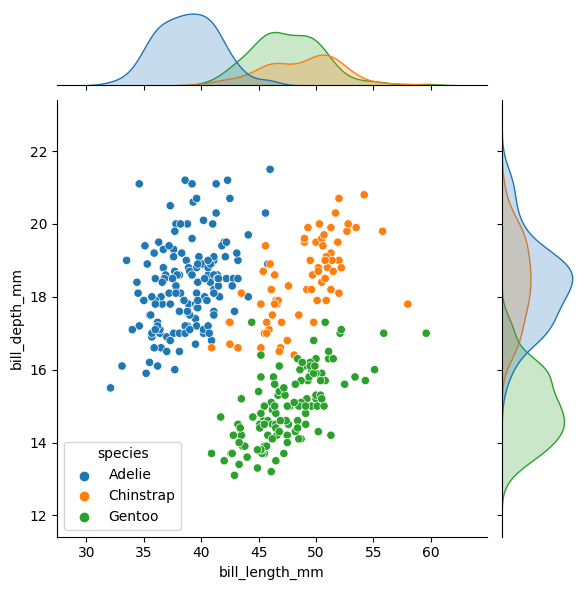

In [26]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue='species')

## Estadística en la ingesta de datos

### Pipelines de procesamiento para variables numéricas

**Transformaciones lineales en Python**

In [27]:
lista

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [28]:
raw = penguins["bill_length_mm"]

max_raw = max(raw)

min_raw = min(raw)

scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

zscore = ((raw - raw.std())/raw.mean())

(array([ 8., 42., 52., 47., 47., 53., 61., 16.,  5.,  2.]),
 array([0.6053567 , 0.66786693, 0.73037717, 0.79288741, 0.85539765,
        0.91790789, 0.98041813, 1.04292837, 1.10543861, 1.16794885,
        1.23045909]),
 <BarContainer object of 10 artists>)

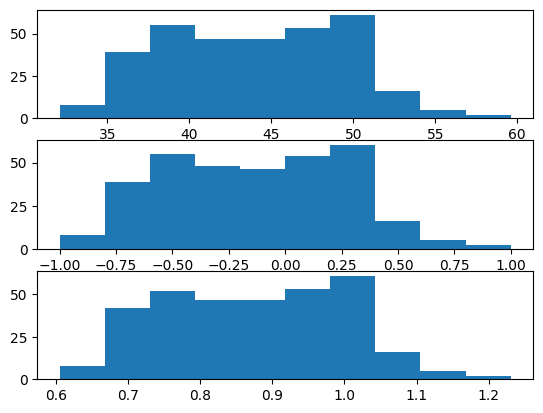

In [29]:
fig, axs = plt.subplots(3, 1, sharex=False)
axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(zscore)

**Transformación no lineal**

<AxesSubplot: >

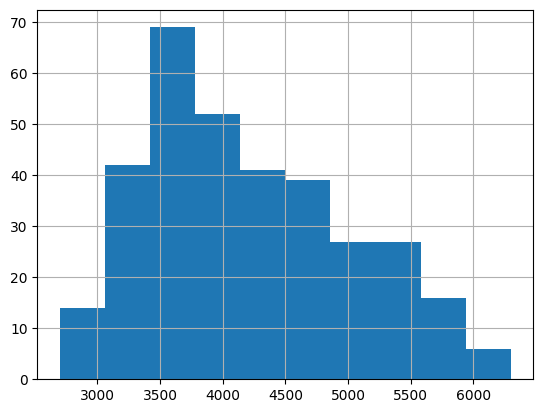

In [30]:
raw = penguins["body_mass_g"]
raw.hist()

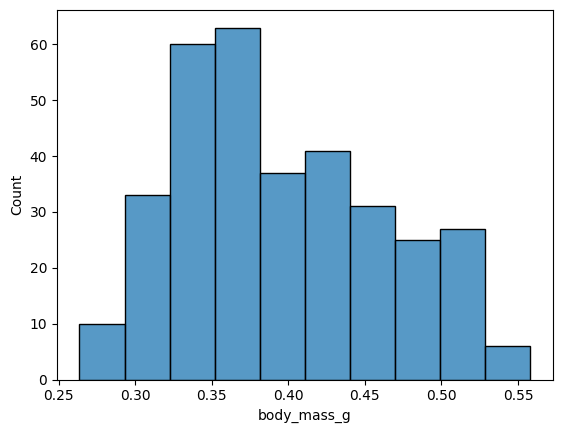

In [31]:
p = 10000
trasform_tanh= raw.apply(lambda x: np.tanh(x/p))
sns.histplot(trasform_tanh)
plt.show()

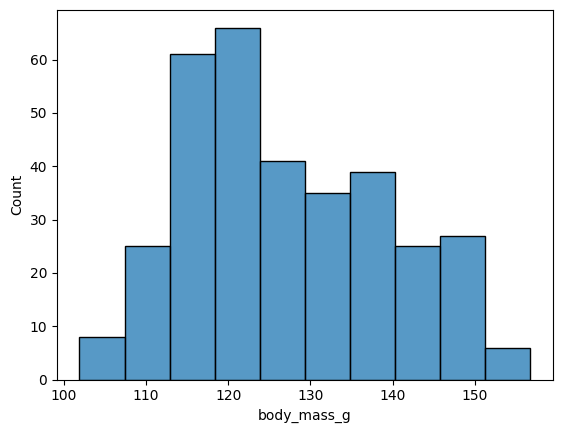

In [32]:
# Aplicamos la transformación Box-Cox con lambda=0.5
x_transformed = stats.boxcox(penguins["body_mass_g"], lmbda=0.5)

sns.histplot(x_transformed)
plt.show()

### Pipelines de procesamiento para variables categóricas

In [33]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [34]:
pd.get_dummies(penguins['species'])

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
338,0,0,1
340,0,0,1
341,0,0,1
342,0,0,1


In [35]:
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [36]:
encoder.fit(penguins[['species']].values)

OneHotEncoder(handle_unknown='ignore')

In [37]:
encoder.transform([['Chinstrap'],['Adelie'], ['Salmon']]).toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

## Correlaciones: covarianza y coeficiente de correlación

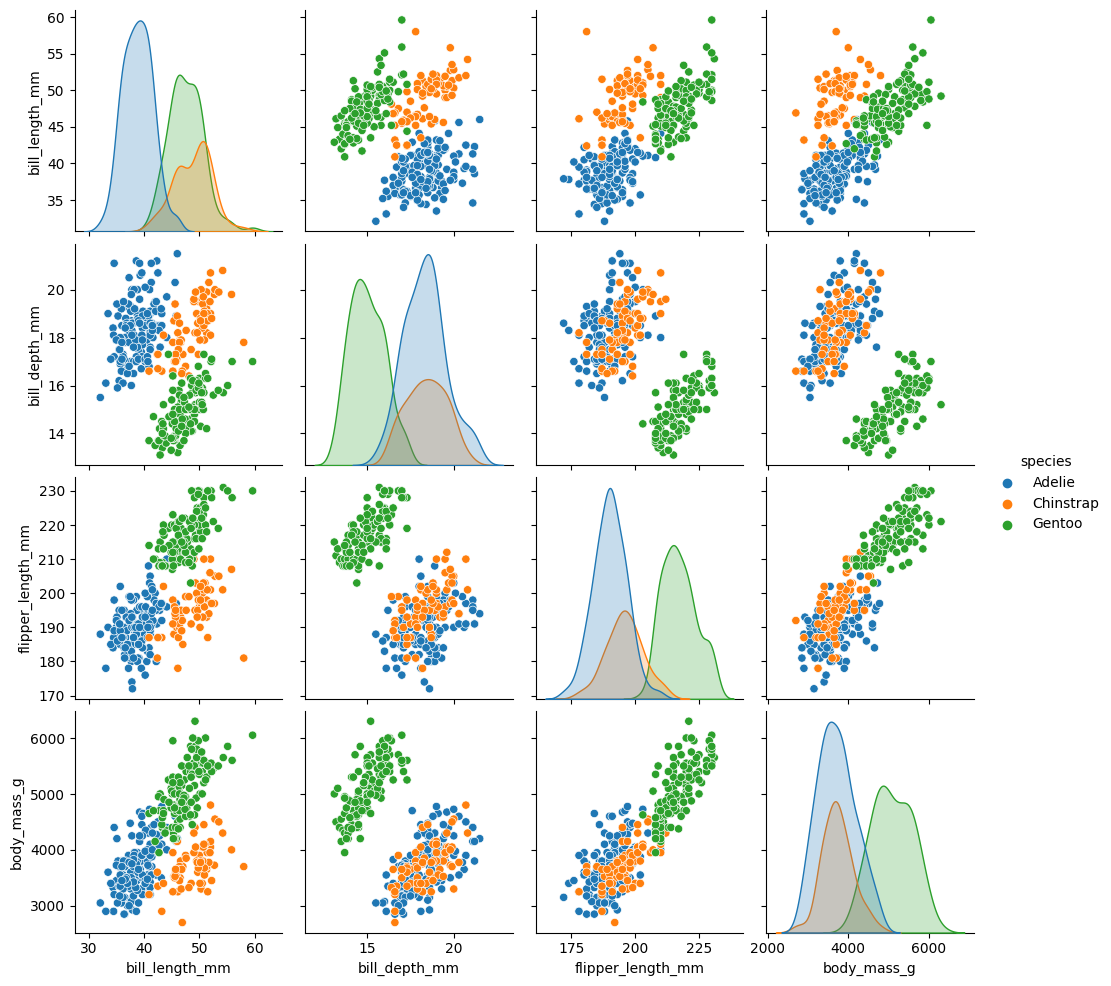

In [38]:
sns.pairplot(penguins, hue='species')

In [39]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [51]:
scaler = StandardScaler()
scaled = scaler.fit_transform(
    penguins[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']]
)
scaled.T

array([[-0.89604189, -0.82278787, -0.67627982, ...,  1.17338426,
         0.22108196,  1.08181673],
       [ 0.7807321 ,  0.11958397,  0.42472926, ..., -0.74499437,
        -1.20271231, -0.54156417],
       [-1.42675157, -1.06947358, -0.42637319, ...,  1.50292796,
         0.78837197,  0.85982757],
       [-0.56847478, -0.50628618, -1.1903608 , ...,  1.91906927,
         1.23499466,  1.48374906]])

In [52]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00301205, -0.22931427,  0.65506279,  0.59122657],
       [-0.22931427,  1.00301205, -0.57953203, -0.47343739],
       [ 0.65506279, -0.57953203,  1.00301205,  0.87560835],
       [ 0.59122657, -0.47343739,  0.87560835,  1.00301205]])

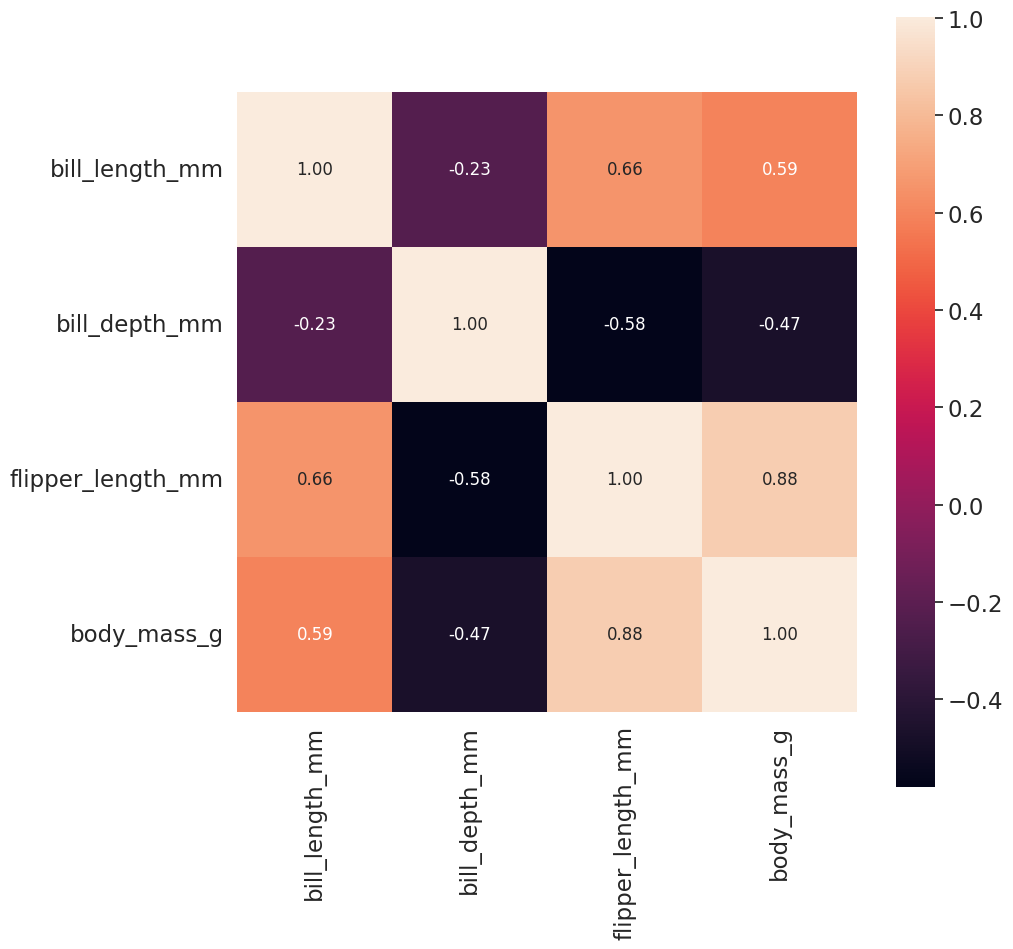

In [53]:
# Mapa de calor de la matriz de covarianza
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g'],
                 xticklabels=['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g'])

### PCA

In [54]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [55]:
eigen_values

array([2.75362487, 0.7804609 , 0.36975289, 0.10820954])

In [56]:
eigen_vectors

array([[-0.45375317,  0.6001949 ,  0.64249509,  0.14516955],
       [ 0.39904723,  0.79616951, -0.42580043, -0.1599044 ],
       [-0.576825  ,  0.00578817, -0.23609516, -0.78198369],
       [-0.54967471,  0.07646366, -0.59173738,  0.58468615]])

In [57]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[68.63389313599903, 19.452929284500147, 9.216062988088332, 2.69711459141248]


In [58]:
pca = PCA(n_components=3)
pca.fit(scaled)

PCA(n_components=3)

In [59]:
pca.explained_variance_ratio_

array([0.68633893, 0.19452929, 0.09216063])

In [60]:
reduced_scaled = pca.transform(scaled)

In [64]:
penguins['pca_1'] = scaled[:,0]
penguins['pca_2'] = scaled[:,1]
penguins['pca_3'] = scaled[:,2]

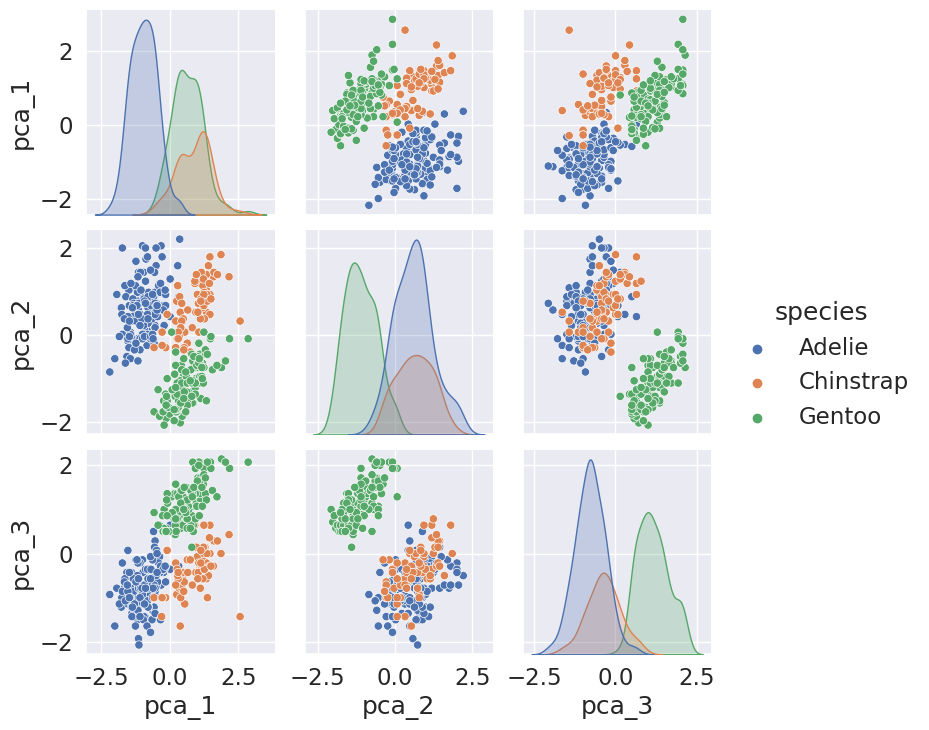

In [63]:
sns.pairplot(penguins[['pca_1', 'pca_2','species','pca_3']], hue='species')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b231cf6-1453-4619-b8ef-09364b0b25a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>